In [28]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#Classifiers
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [49]:
data = pd.read_csv('singloblulos.csv')
data= data.drop('CODIGO',axis=1)

In [50]:
data['SHOCK'] = data['SHOCK'].astype(int)

In [51]:
x = data.drop('SHOCK', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data['SHOCK']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [65]:
y_train.value_counts()

SHOCK
0    717
1    342
Name: count, dtype: int64

In [52]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=45)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [67]:
y_train.value_counts()

SHOCK
1    720
0    717
Name: count, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [11]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes, binary= True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [12]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
        print('recall: {0:.4f}'.format(recall))
        print('f1_score: {0:.4f}'.format(f1))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [13]:
#classes
classes = [0, 1]

In [14]:
# select classifiers
classifiers=[
GradientBoostingClassifier(learning_rate= 0.2, max_depth= 4, n_estimators= 200),
AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha= 0.0, criterion= "gini", max_depth= 30, max_features= "auto", min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 5, splitter= "best"),algorithm= "SAMME.R", learning_rate= 0.1, n_estimators= 50, random_state= 123),
RandomForestClassifier(criterion= "entropy", max_depth=20, max_features= "auto", min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100),
DecisionTreeClassifier(ccp_alpha= 0.0, criterion= "gini", max_depth= 30, max_features= "auto", min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 5, splitter= "best"),
ExtraTreesClassifier(bootstrap= False, criterion= "gini", max_depth= 40, max_features= 2, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50, random_state= 789),
BaggingClassifier(RandomForestClassifier(criterion= "entropy", max_depth=20, max_features= "auto", min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100),),
]

names=['GB', 'ABDT', 'RF','DT', 'ET', 'BGRF']

Train runtime: 0.7949435710906982
Test runtime: 0.03388214111328125


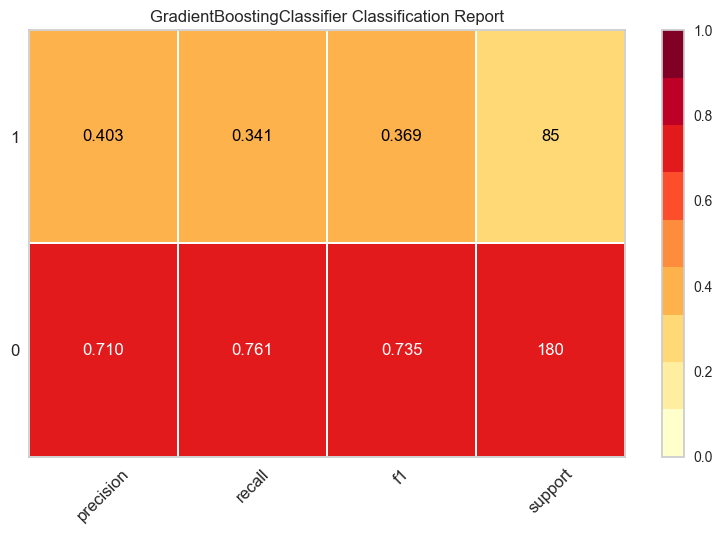

Train runtime: 0.28078317642211914
Test runtime: 0.060424089431762695


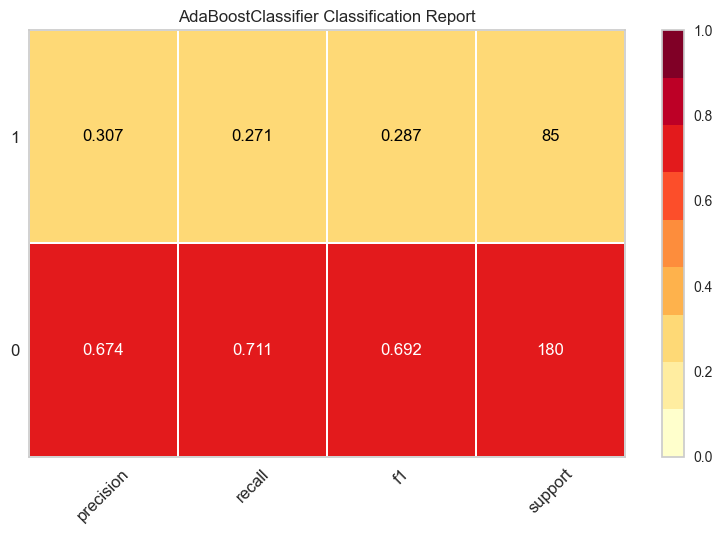

Train runtime: 0.3961324691772461
Test runtime: 0.05251121520996094


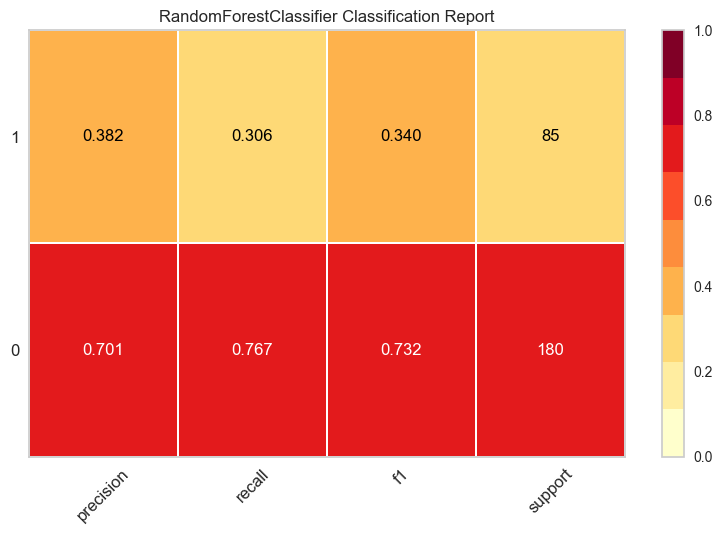

Train runtime: 0.0031387805938720703
Test runtime: 0.02736830711364746


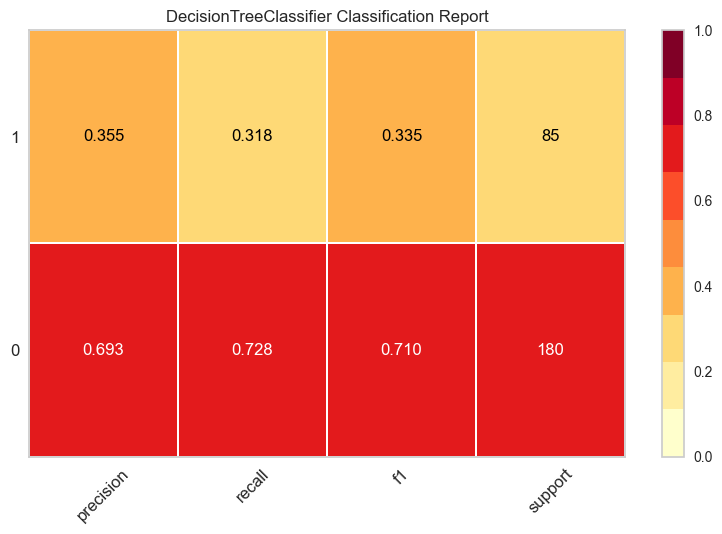

Train runtime: 0.17762994766235352
Test runtime: 0.04908347129821777


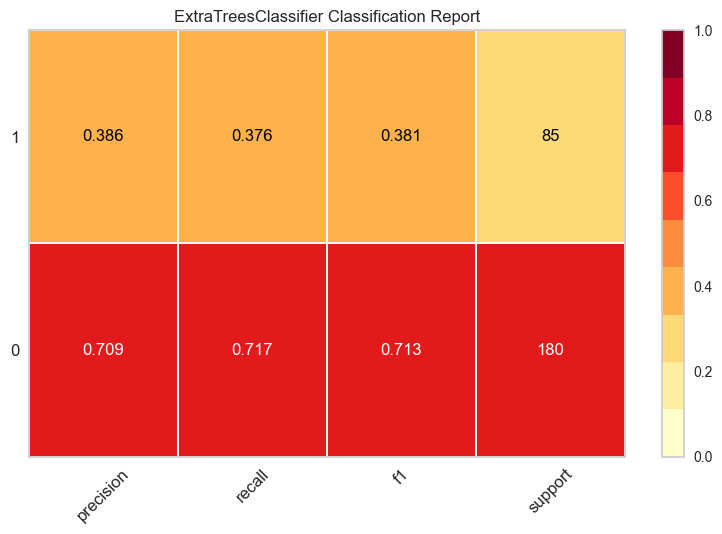

Train runtime: 3.042670249938965
Test runtime: 0.2249910831451416


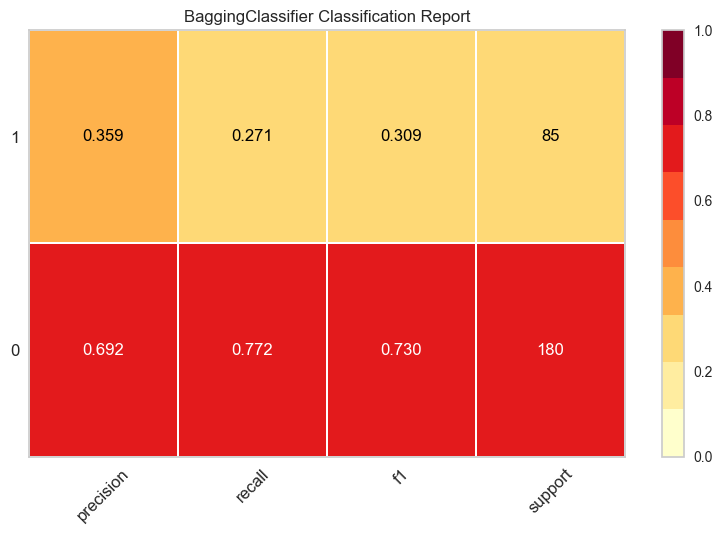

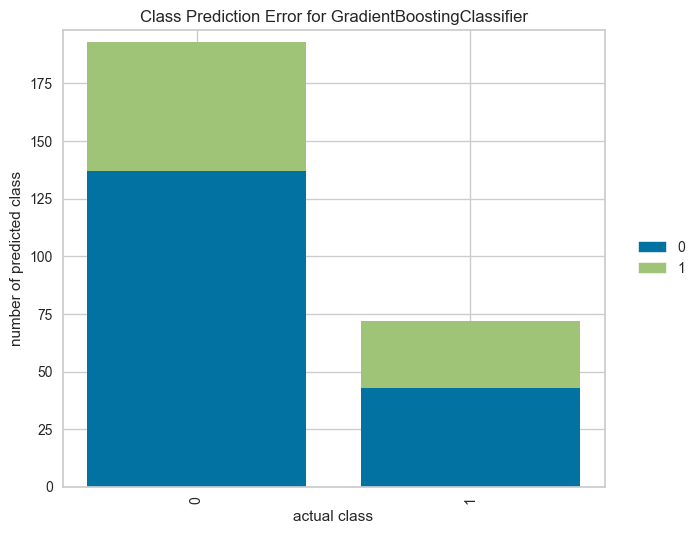

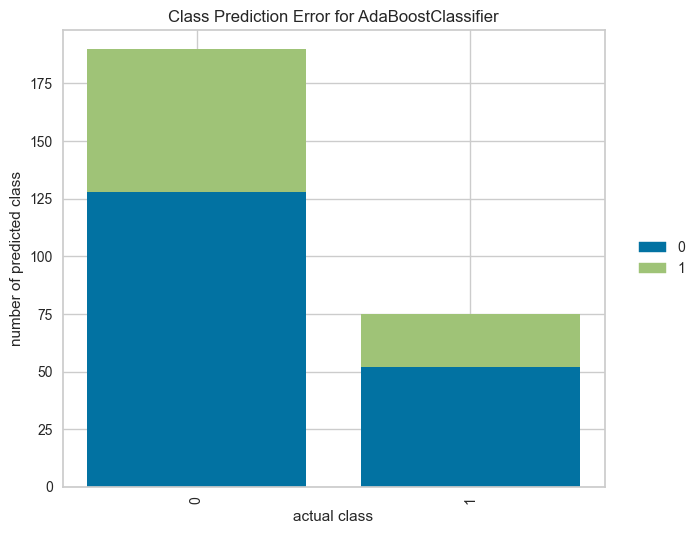

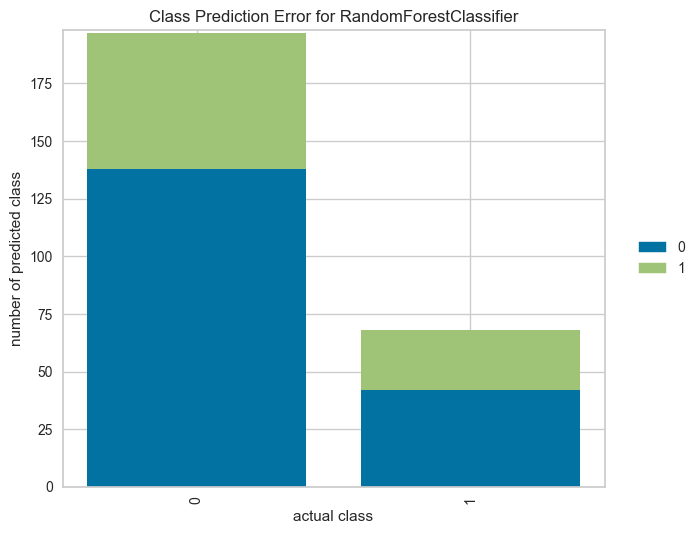

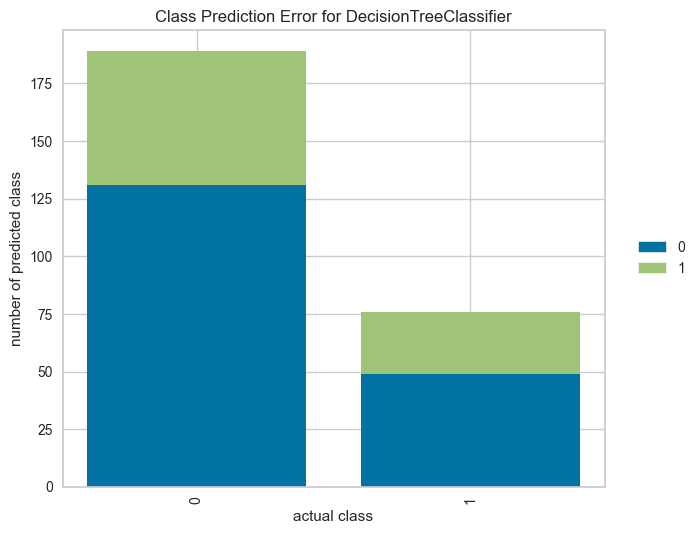

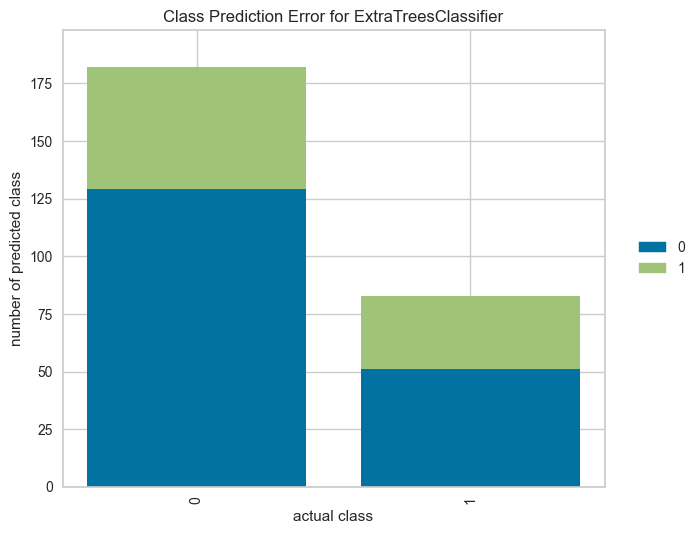

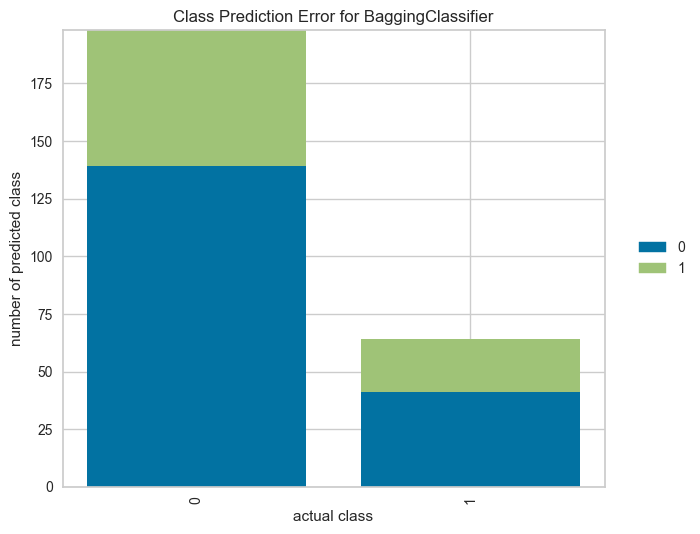

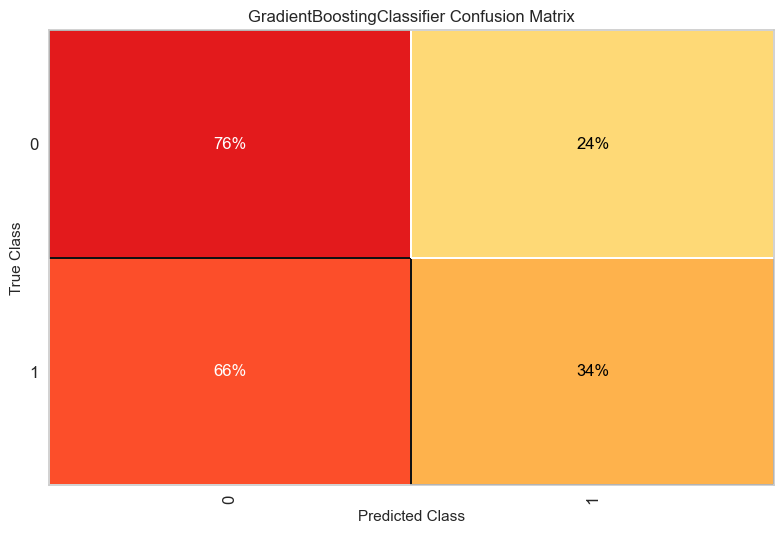

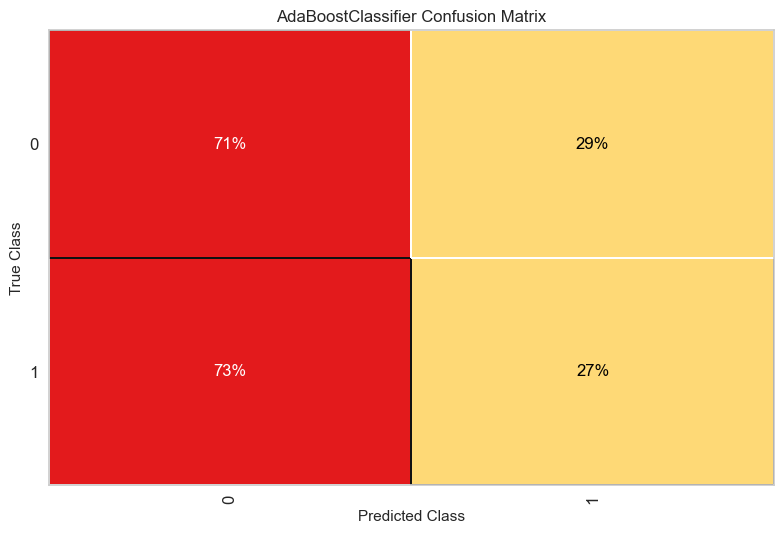

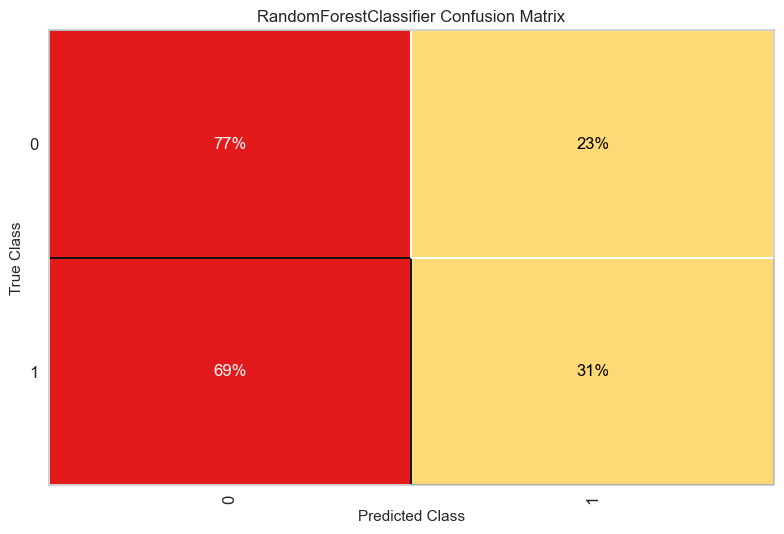

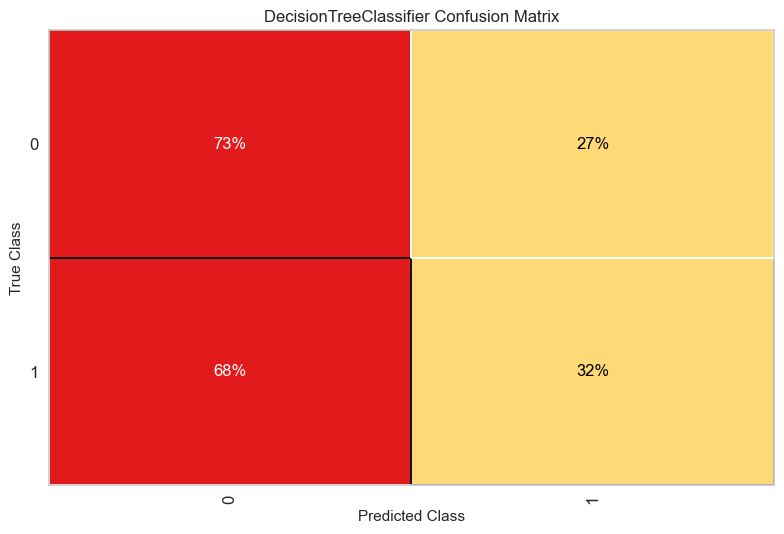

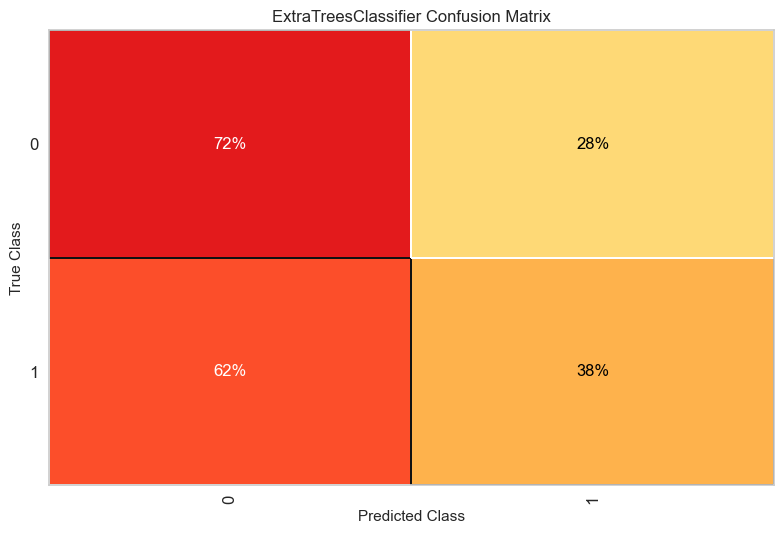

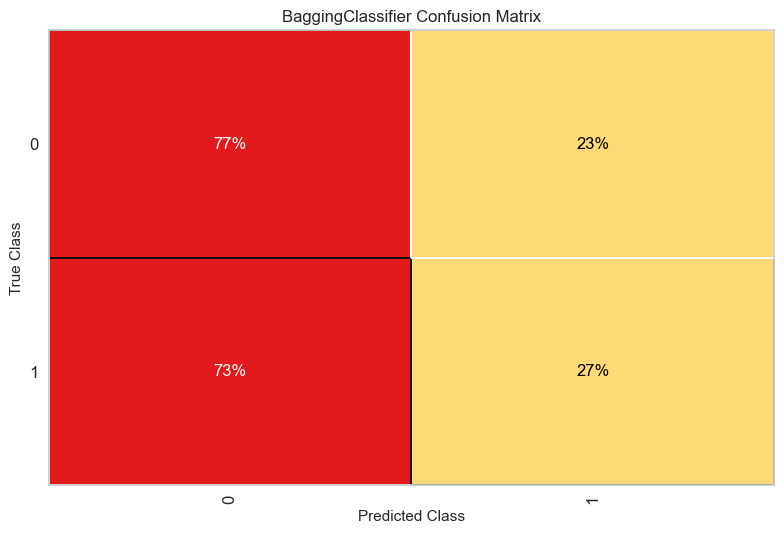

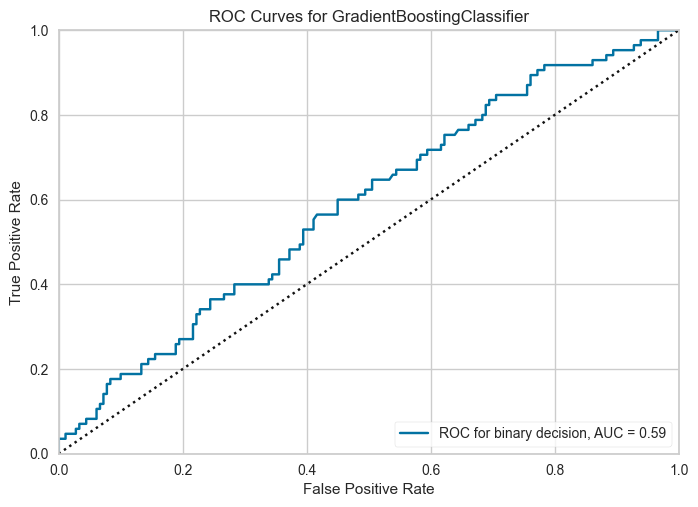

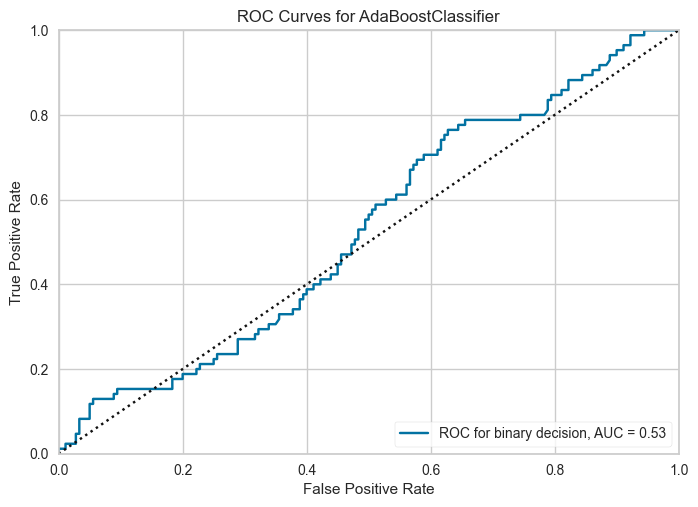

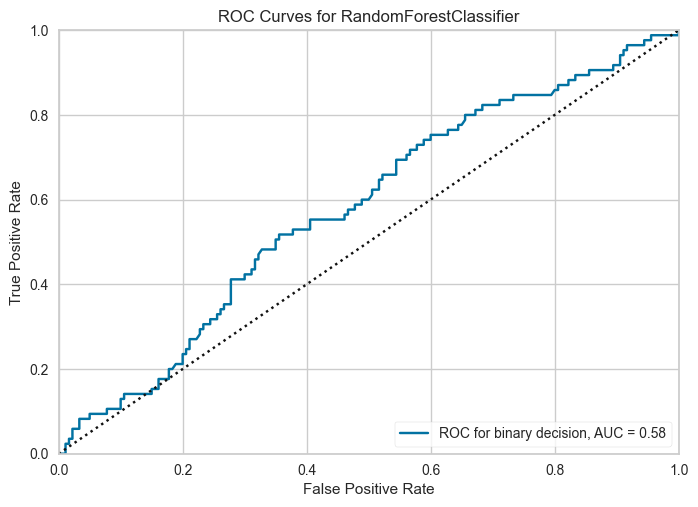

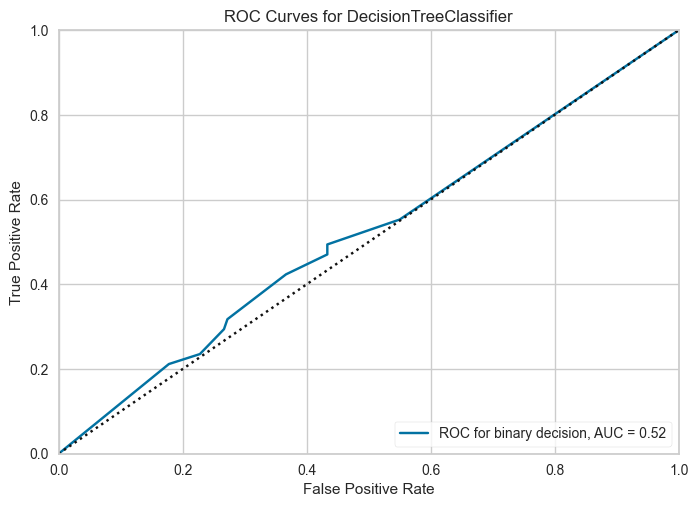

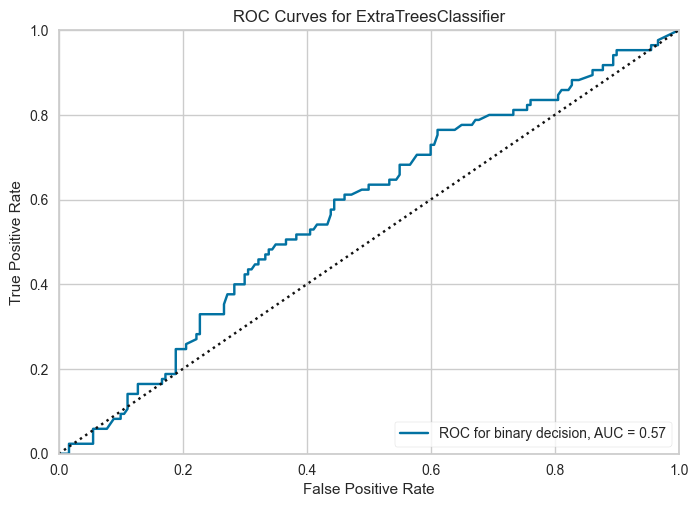

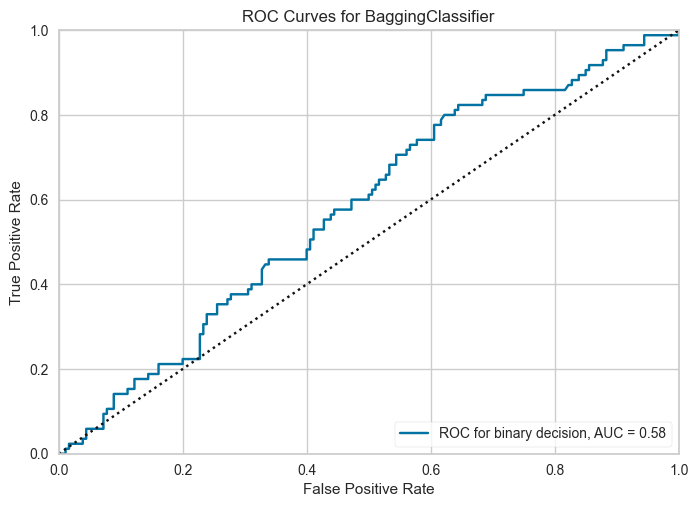

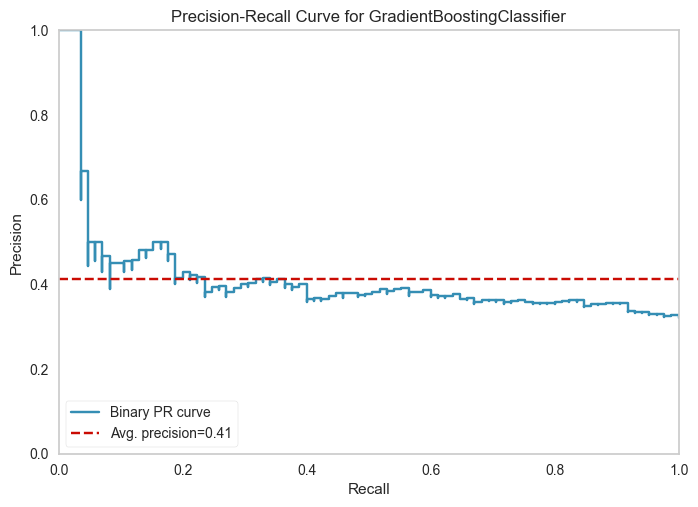

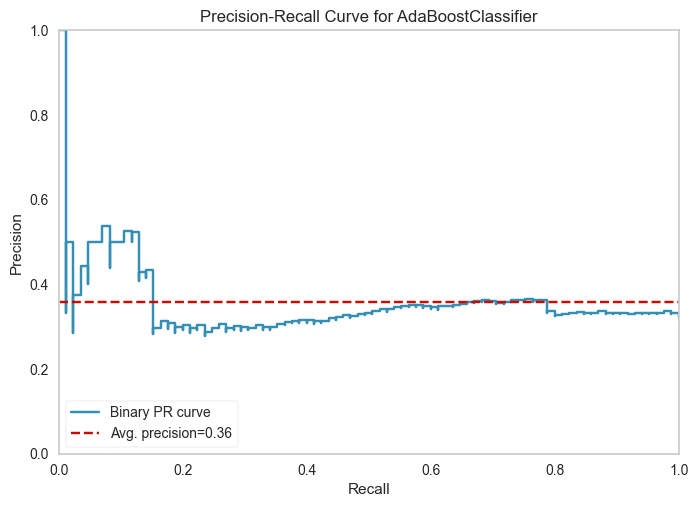

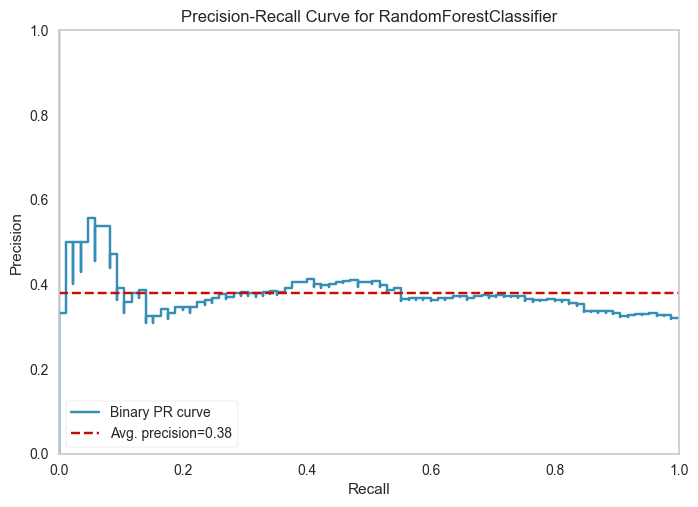

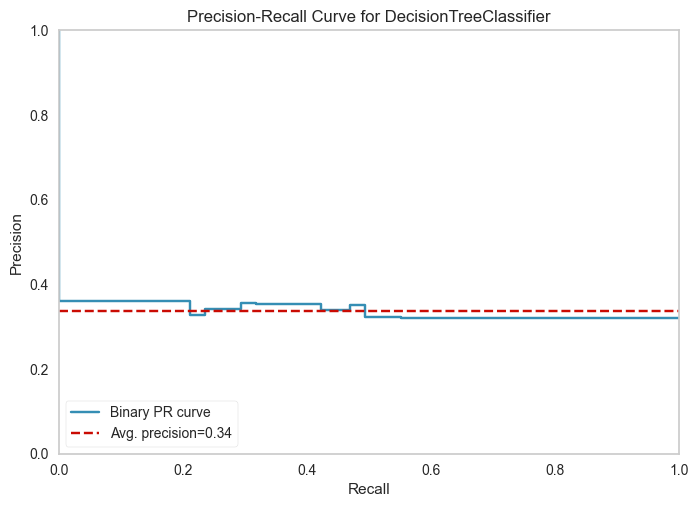

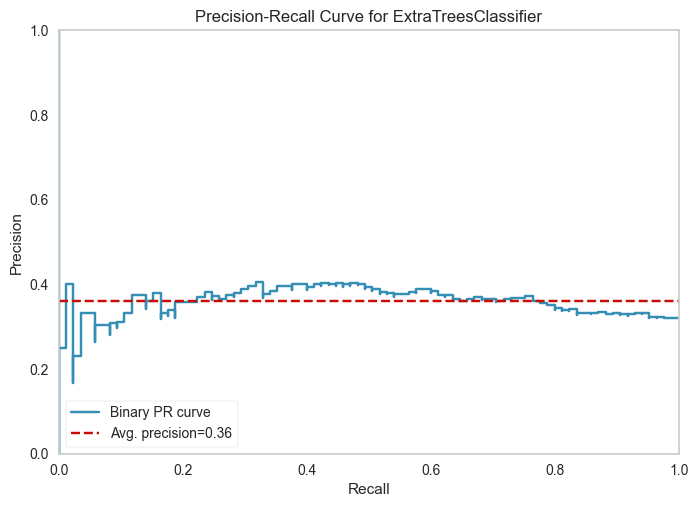

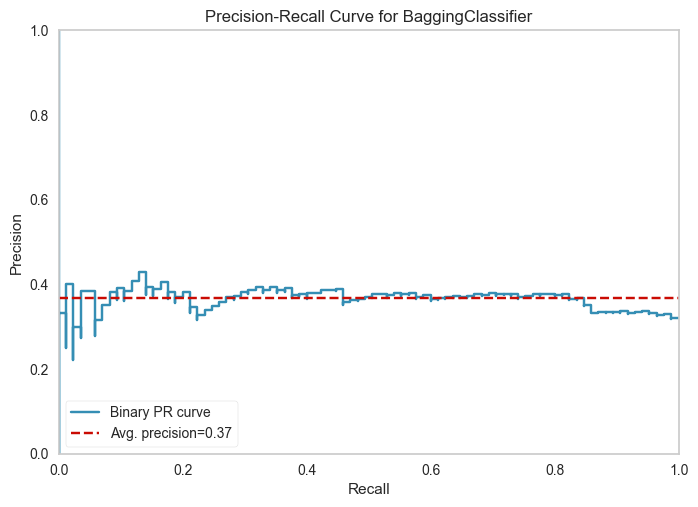

In [15]:
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [16]:
classifier_metrics()

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=200)
accuracy_score: 0.6302
cohen_kappa_score: 0.1185
log_loss: 0.7598
zero_one_loss: 0.3698
hemming_loss: 0.3698
matthews_corrcoef: 0.1192
recall: 0.3529
f1_score: 0.3797

---------------------------------------------------------------------------------
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=30,
                                                    max_features='auto',
                                                    min_samples_split=5),
                   learning_rate=0.1, random_state=123)
accuracy_score: 0.5698
cohen_kappa_score: -0.0189
log_loss: 5.7169
zero_one_loss: 0.4302
hemming_loss: 0.4302
matthews_corrcoef: -0.0190
recall: 0.2706
f1_score: 0.2875

---------------------------------------------------------------------------------
RandomForestClassifier(criterion='entropy', max_depth=20, max_features='auto')
accuracy_score: 0.6151
cohen_kappa_score: 0.0765
log_loss: 0.6751
zero_on

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for i in range(len(classifiers)):
  print(names[i])
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realiza la validación cruzada y obtén las puntuaciones de rendimiento
  puntuaciones = cross_val_score(classifiers[i], X_train, y_train, cv=kf)
  desviacion_estandar = np.std(puntuaciones)

  # Imprime las puntuaciones de rendimiento
  #print("Puntuaciones de rendimiento: ", puntuaciones)
  print("Puntuación media: ", np.mean(puntuaciones))
  print("Desviación estándar: ", desviacion_estandar)

GB
Puntuación media:  0.6980013550135502
Desviación estándar:  0.03453214253117905
ABDT
Puntuación media:  0.6903237514518001
Desviación estándar:  0.025351716270780804
RF
Puntuación media:  0.7000822686798297
Desviación estándar:  0.02801496220281144
DT
Puntuación media:  0.6680337785520712
Desviación estándar:  0.02110510947928493
ET
Puntuación media:  0.6924070847851336
Desviación estándar:  0.03799354134733791
BGRF
Puntuación media:  0.7035496515679442
Desviación estándar:  0.02606353843830604


In [55]:
dt = DecisionTreeClassifier(ccp_alpha= 0.0, criterion= "gini", max_depth= 30, max_features= "auto", min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 5, splitter= "best")

In [56]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, max_features='auto', min_samples_split=5)

In [36]:
%matplotlib inline
import shap
import matplotlib.pyplot as plt


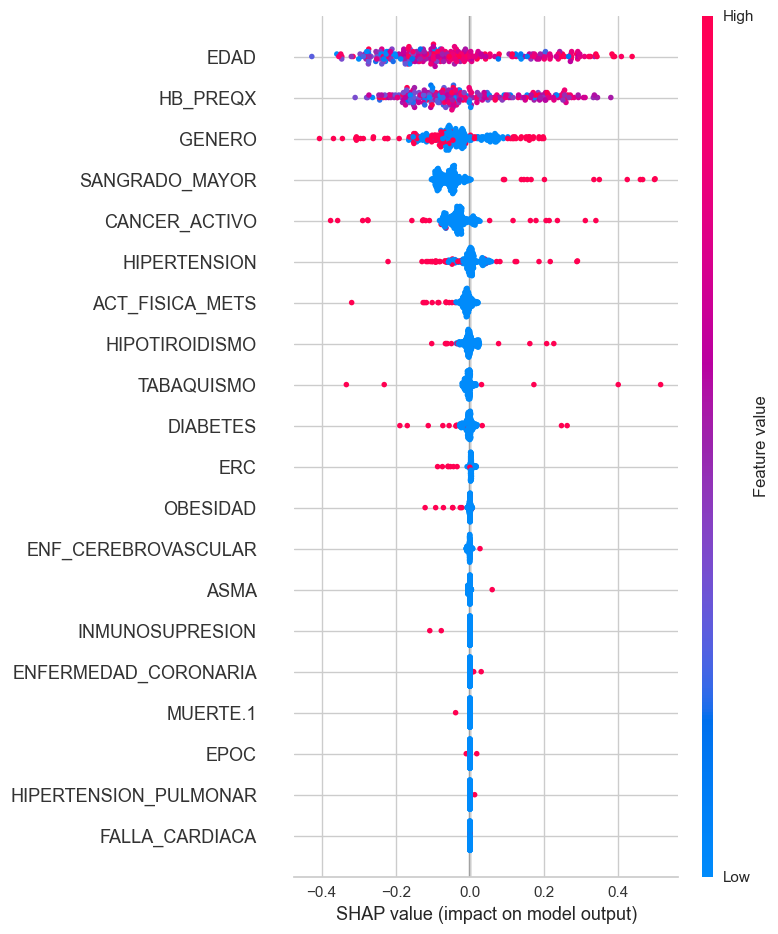

In [102]:
# Crear el explicador SHAP usando el conjunto de entrenamiento
explainer_ebm = shap.Explainer(dt.predict, X_train)

# Obtener los valores SHAP para el conjunto de prueba
shap_values_ebm = explainer_ebm(X_test)

# Asegurarse de que X_test sea un DataFrame con los nombres de las columnas
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    feature_names = x.columns

# Visualizar la importancia de las características con un gráfico de resumen
shap.summary_plot(shap_values_ebm, X_test, feature_names=feature_names)




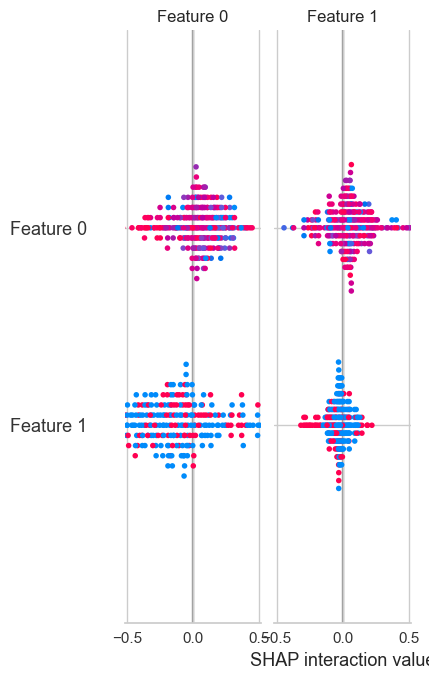

In [23]:
# Crear un objeto explainer
explainer = shap.Explainer(dt)

# Obtener los valores SHAP para una muestra de datos
shap_values = explainer(X_test)

# Inicializar el entorno JavaScript para las visualizaciones SHAP
shap.initjs()

# Crear una gráfica de resumen SHAP
shap.summary_plot(shap_values, X_test)


In [38]:
explainer = shap.TreeExplainer(dt)
shap_values = explainer(X_test)

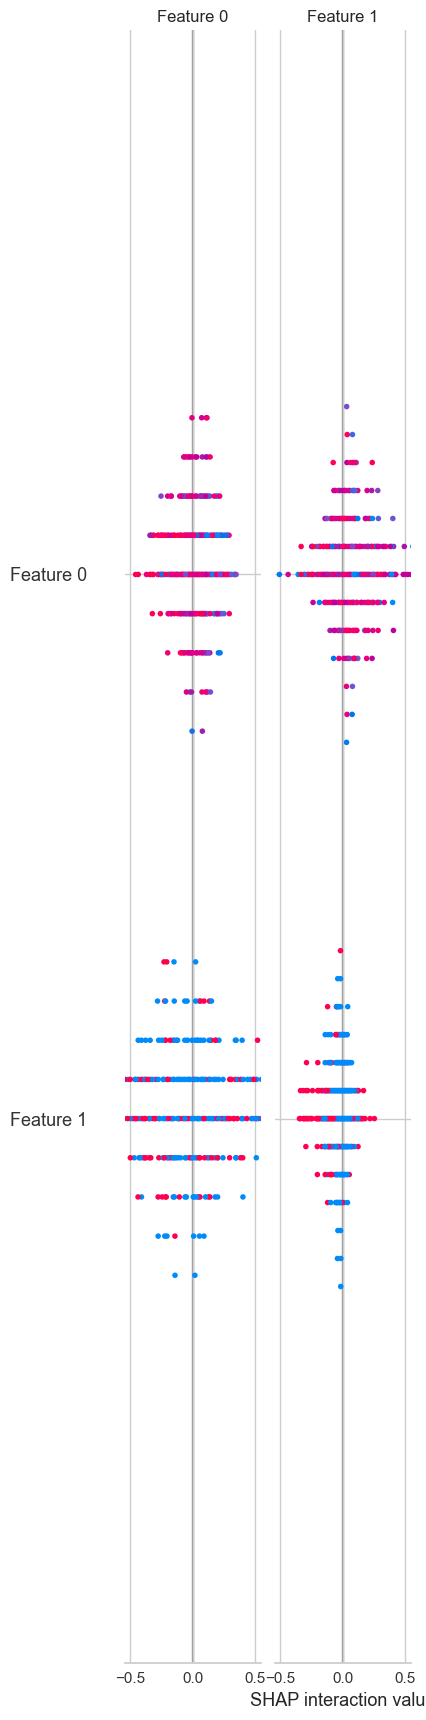

In [39]:
# SHAP Summary Plot
sum_shap_values = explainer.shap_values(X_test)
shap.summary_plot(sum_shap_values, X_test, max_display=20, plot_type="violin")

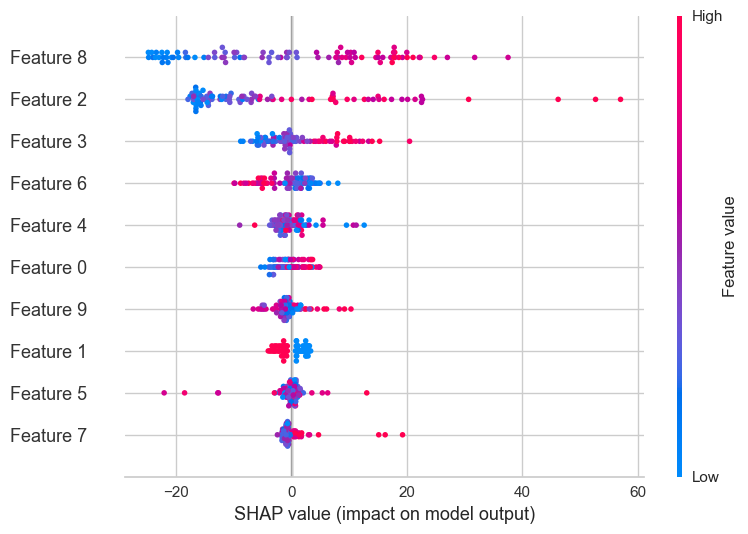

In [13]:
import shap
import xgboost
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar un modelo de ejemplo (usando XGBoost en este caso)
model = xgboost.XGBRegressor(learning_rate=0.01, n_estimators=100)
model.fit(X_train, y_train)

# Crear un objeto explainer
explainer = shap.Explainer(model, X_train)

# Obtener los valores SHAP para una muestra de datos
shap_values = explainer(X_test)

# Inicializar el entorno JavaScript para las visualizaciones SHAP
shap.initjs()
feature_names = [
    a + ": " + str(b) for a,b in zip(columns, np.abs(shap_values.values).mean(0).round(2))
]


# Crear una gráfica de resumen SHAP
shap.summary_plot(shap_values, X_test)


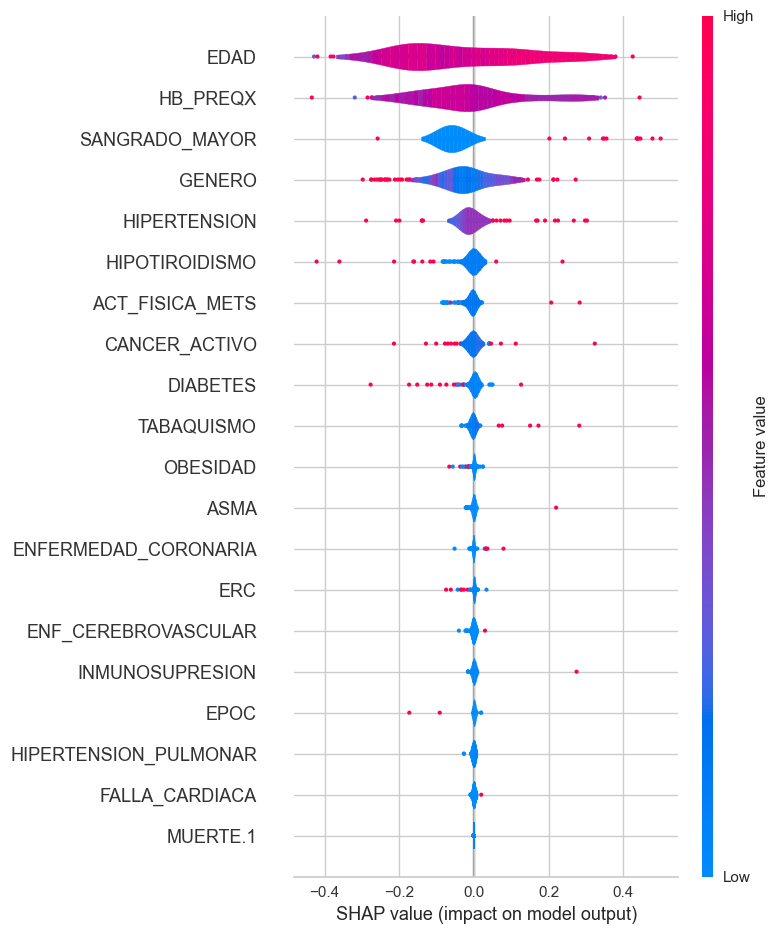

In [87]:
# Create a Tree SHAP explainer and calculate SHAP values
features = x.columns
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[:,:,1], X_test,plot_type= "violin", feature_names= features)

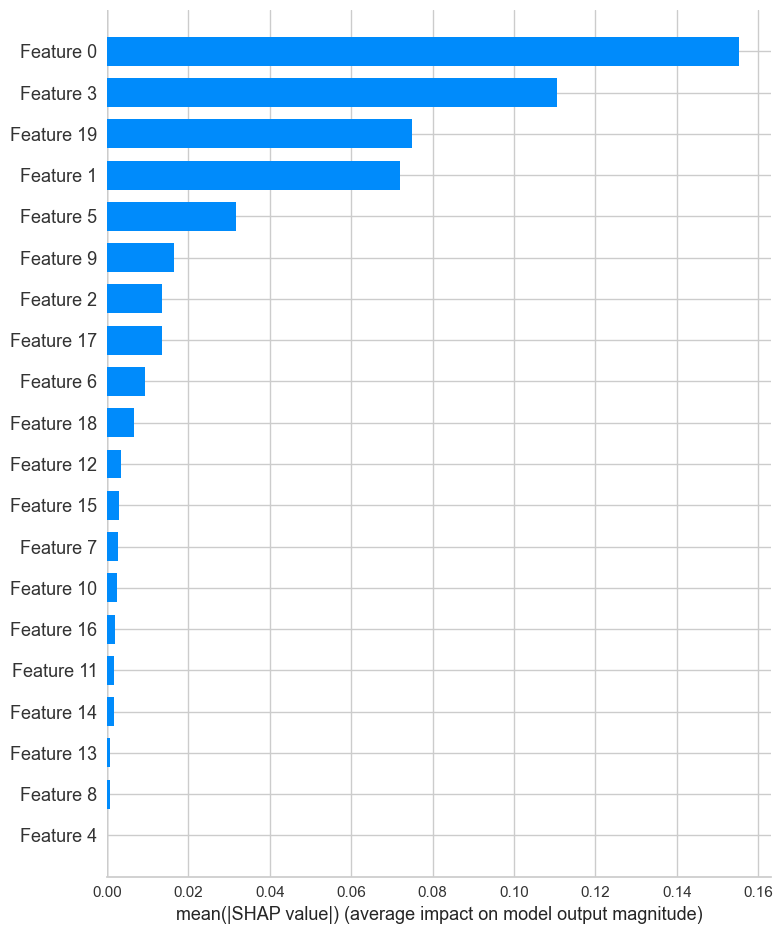

In [72]:
# Create a Tree SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[:,:,0], X_test, plot_type= "bar")

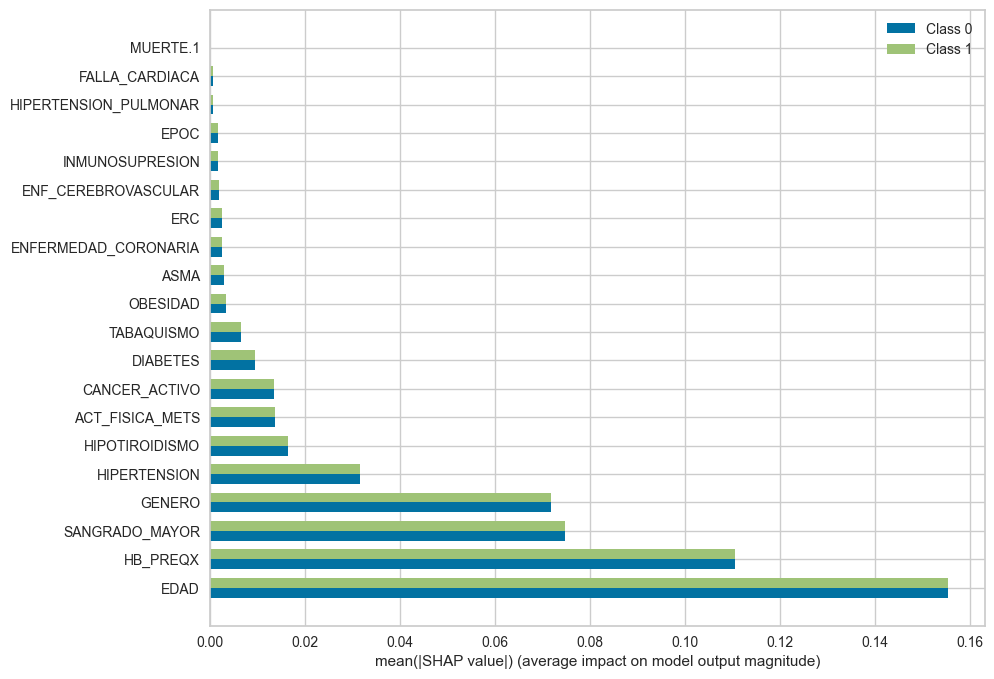

In [82]:
# Supongamos que shap_values contiene los valores SHAP para dos clases
shap_values_class0 = shap_values[:,:,0]
shap_values_class1 = shap_values[:,:,1]

# Calcular el valor medio absoluto de los SHAP values para cada característica en ambas clases
shap_values_mean_class0 = np.abs(shap_values_class0).mean(axis=0)
shap_values_mean_class1 = np.abs(shap_values_class1).mean(axis=0)

# Crear un dataframe con los valores medios
features = x.columns
mean_shap_values = pd.DataFrame({
    'Feature': features,
    'Class 0': shap_values_mean_class0,
    'Class 1': shap_values_mean_class1
})

# Ordenar por la suma de los valores medios para ambas clases
mean_shap_values['Sum'] = mean_shap_values['Class 0'] + mean_shap_values['Class 1']
mean_shap_values = mean_shap_values.sort_values(by='Sum', ascending=False)

# Crear la gráfica
bar_width = 0.35
index = np.arange(len(features))

fig, ax = plt.subplots(figsize=(10, 8))

bar1 = ax.barh(index, mean_shap_values['Class 0'], bar_width, label='Class 0')
bar2 = ax.barh(index + bar_width, mean_shap_values['Class 1'], bar_width, label='Class 1')

ax.set_xlabel('mean(|SHAP value|) (average impact on model output magnitude)')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(mean_shap_values['Feature'])
ax.legend()

plt.show()